In [34]:
import pandas as pd
import numpy as np
import ast
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [36]:
catalog_df = pd.read_csv('drive/MyDrive/collab_files/product_catalog.csv')
catalog_df

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]
...,...,...,...,...,...,...,...,...
32771,12036,1383,10,0,503,0,101,"[3502, 1088, 2004, 691, 3422, 2308, 308, 3688,..."
32772,22709,567,4,2,491,3,66,"[3900, 3905, 3903, 3910, 1807, 274, 1467, 914]"
32773,32322,1385,10,1,500,0,37,"[2686, 2609, 725]"
32774,19118,1113,6,2,491,0,117,"[3900, 3910, 3903, 2473, 914, 274]"


In [37]:
catalog_df['categories'].value_counts().iloc[10:20]

,count
categories,
[1980],123
[3138],111
[163],108
[3424],103
[3278],80
"[1629, 3979]",77
[1350],75
"[146, 1138]",74
[2470],73


In [38]:
print("# -1 values in attributes")
for i in range(1,6):
  str1 = 'attribute_'+ str(i)
  print(f"{str1} : {catalog_df[catalog_df[str1]==-1]['product_id'].count()}")

# -1 values in attributes
attribute_1 : 4
attribute_2 : 0
attribute_3 : 466
attribute_4 : 617
attribute_5 : 4264


In [39]:
pd.set_option('display.max_rows', None)       # Show all rows
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)


In [40]:
# Step 1: Calculate the mode for each group
mode_values = catalog_df.groupby(['attribute_2', 'attribute_1'])['categories'].agg(lambda x: pd.Series.mode(x))

# Step 2: Map the mode values back to the original DataFrame
catalog_df['mode_fill'] = catalog_df.set_index(['attribute_2', 'attribute_1']).index.map(mode_values)

# Step 3: Fill NaN values in 'categories' with the corresponding mode values
catalog_df['categories'].fillna(catalog_df['mode_fill'], inplace=True)

# Drop the temporary 'mode_fill' column if no longer needed
catalog_df.drop(columns=['mode_fill'], inplace=True)


In [41]:
catalog_df.isna().sum()

,0
product_id,0
manufacturer_id,0
attribute_1,0
attribute_2,0
attribute_3,0
attribute_4,0
attribute_5,0
categories,0


In [42]:
catalog_df.loc[14463,'categories'] = [308] # for the empty list

In [43]:
catalog_df['categories'] = catalog_df['categories'].astype(str)

In [ ]:
# target_categories = [3916,2136,3900,300,1984,3810,2209,1708,1221,981,2834,2995,3901,3283,3639,1807,1098,1628,1772,3908,1298,2165,300,1529,3915,3222,308,2732,3625,3254,1085,2833,1138,146,327,74]

In [ ]:
# catalog_df['categories'] = catalog_df['categories'].apply(ast.literal_eval)

In [ ]:
# def assign_category(cat_list):
#     if len(cat_list) == 1 and isinstance(cat_list[0],int):
#         return int(cat_list[0])
#     for target in target_categories:
#         if target in cat_list:
#             return int(target)
#     return cat_list
# catalog_new = catalog_df.copy()
# catalog_new['categories'] = catalog_df['categories'].apply(assign_category)
# catalog_new.head(10)

In [ ]:
# type(catalog_new.loc[32655,'categories'])

In [ ]:
# # Filter rows where 'categories' column entries are not integers
# non_integer_rows = catalog_new[catalog_new['categories'].apply(lambda x: not isinstance(x, int))].reset_index(drop=True)
# len(non_integer_rows)

In [ ]:
# from collections import Counter


# # String formatındaki listeleri dönüştürme
# # Tüm kategorileri bir araya getirme
# all_categories = [item for sublist in non_integer_rows['categories'] for item in sublist]

# # En çok tekrar eden kategorileri bulma
# category_counts = Counter(all_categories)
# most_common_categories = category_counts.most_common(20)

# # Sonucu yazdırma
# print(most_common_categories)


In [44]:
category_map_df = pd.read_csv("/content/drive/MyDrive/collab_files/product_category_map.csv")
category_map_df.head()

,category_id,parent_category_id
0,0,75
1,1,1499
2,2,1082
3,3,3498
4,4,1623


In [45]:
category_map_df = category_map_df.drop_duplicates(subset=['category_id'])
category_map_df[category_map_df['category_id'].duplicated(keep=False)]

,category_id,parent_category_id


In [46]:
category_map_df[category_map_df['category_id']==category_map_df['parent_category_id']]['category_id'].values

array([3898])

In [47]:
def category_mapper(df):
  top_nodes = df[df['category_id']==df['parent_category_id']]['category_id'].values
  category_map_df_filtered = df.copy()
  category_map_df_filtered.loc[category_map_df_filtered['parent_category_id'].isin(top_nodes),'parent_category_id']=category_map_df_filtered['category_id']
  parent_list=category_map_df_filtered[category_map_df_filtered['category_id']==category_map_df_filtered['parent_category_id']]['category_id'].values
  return category_map_df_filtered,parent_list


In [48]:
catalog_df['categories'] = catalog_df['categories'].apply(ast.literal_eval)
catalog_df['categories'] = catalog_df['categories'].apply(lambda x: sorted(x))

catalog_df.loc[0,'categories']

[855, 2890, 3908, 3909]

In [49]:
def category_row_transform(row, df_map, parents):
    category = row['categories']
    # Check if the first element is an integer; if not, set it to 3898
    if not isinstance(category[0], int):
        element = int(category[0][1:5])
    else:
      element = int(category[0])
    while element not in parents:
        element = df_map.loc[df_map['category_id'] == element, 'parent_category_id'].values[0]
    row['categories'] = element
    return row


In [50]:
category_map_df_filtered, parent_list = category_mapper(category_map_df)
parent_list

array([  34,  182,  252,  275,  298,  322,  336,  366,  370,  381,  422,
        432,  519,  535,  600,  621,  678,  686,  754,  857,  875,  959,
        965, 1062, 1072, 1102, 1447, 1480, 1528, 1543, 1557, 1559, 1565,
       1666, 1677, 1682, 1735, 1763, 1790, 1825, 1840, 2006, 2011, 2012,
       2105, 2109, 2209, 2231, 2346, 2364, 2371, 2597, 2723, 2762, 2793,
       2838, 2855, 2917, 2920, 2928, 3056, 3077, 3110, 3189, 3263, 3283,
       3288, 3330, 3409, 3444, 3451, 3476, 3504, 3540, 3613, 3616, 3617,
       3624, 3685, 3752, 3852, 3860, 3898, 3899, 3900, 3901, 3902, 3903,
       3904, 3905, 3906, 3907, 3908, 3909, 3910, 3911, 3912, 3913, 3914,
       3915, 3916, 3917, 3918, 3919, 3920, 3921, 3922, 3923, 3924, 3925,
       3926, 3927, 3928, 3929, 3930, 3931, 3932, 3933, 3934, 3935, 3936,
       3937, 3938, 3939, 3940, 3941, 3942, 3943, 3944, 3945, 3946, 3947,
       3948, 3949, 3950, 3951, 3952, 3953, 3954, 3955, 3956, 3957, 3958,
       3959, 3960, 3961, 3962, 3963, 3964, 3965, 39

In [51]:
# Set 'parent_category_id' and 'category_id' to 3898 if they are greater than 3898
category_map_df_filtered.loc[category_map_df_filtered['parent_category_id'] >= 3898, 'parent_category_id'] = 3898
category_map_df_filtered.loc[category_map_df_filtered['category_id'].astype(int) >= 3898, 'category_id'] = 3898
category_map_df_filtered = category_map_df_filtered.drop_duplicates(subset=['category_id', 'parent_category_id'])


In [52]:
catalog_df_transformed = catalog_df.apply(lambda row: category_row_transform(row,category_map_df_filtered,parent_list),axis=1)

In [53]:
vcounts= catalog_df_transformed['categories'].value_counts()
len(vcounts)

106

<Axes: xlabel='categories'>

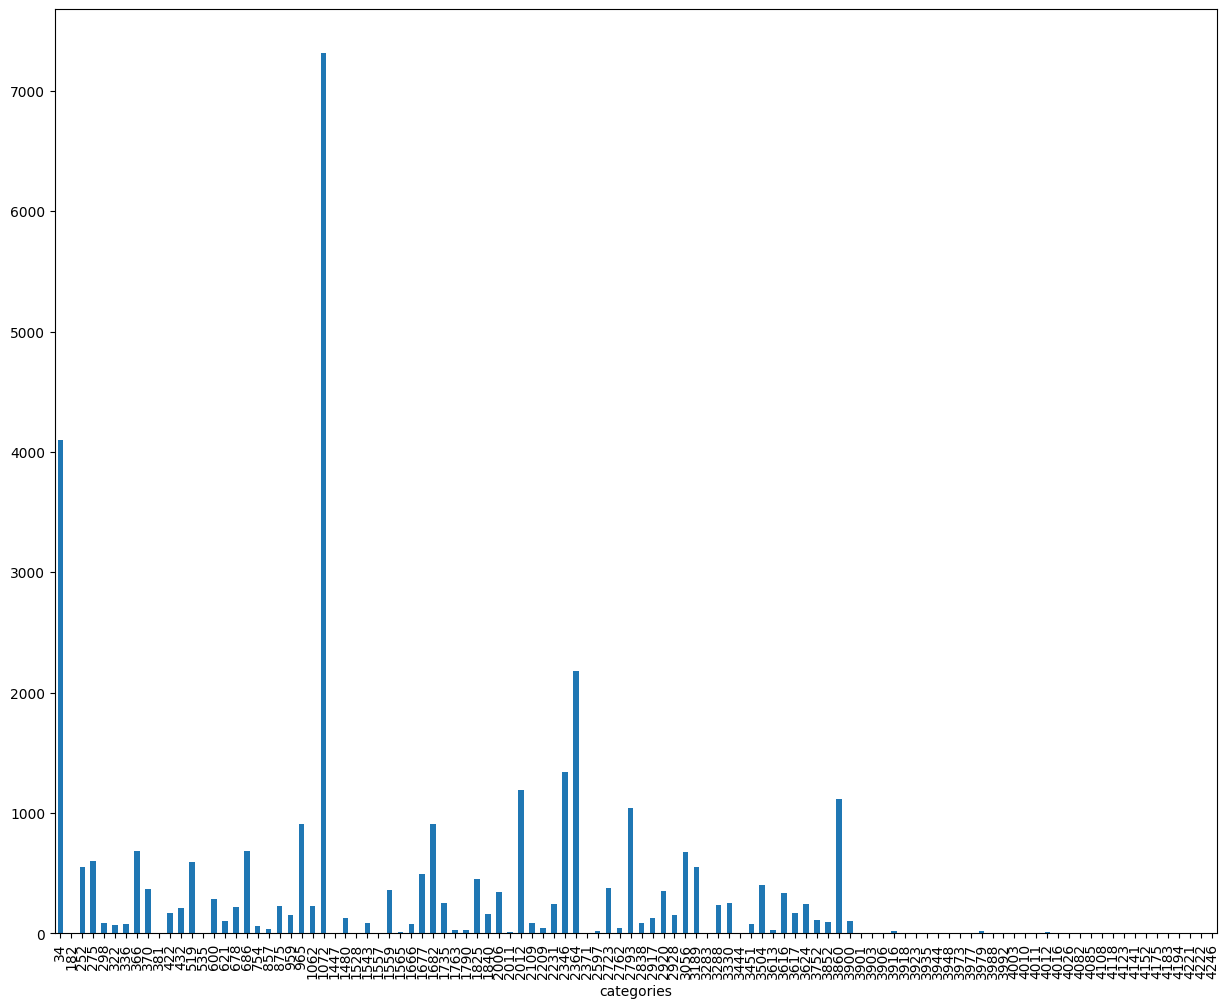

In [54]:
value_counts_filtered = vcounts.sort_index()
value_counts_filtered.plot(kind='bar', figsize=(15, 12))


In [55]:
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 182, 'categories'] = 34
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 336, 'categories'] = 366
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 252, 'categories'] = 275
catalog_df_transformed.loc[catalog_df_transformed['categories'] >= 3898, 'categories'] = 3898
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 422, 'categories'] = 432
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 678, 'categories'] = 686
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 857, 'categories'] = 875
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 1062, 'categories'] = 1072
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 422, 'categories'] = 432
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 1557, 'categories'] = 1559
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 1565, 'categories'] = 1559
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 1666, 'categories'] = 1677
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 2011, 'categories'] = 2012
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 2209, 'categories'] = 2109
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 2346, 'categories'] = 2364
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 422, 'categories'] = 432
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 3283, 'categories'] = 3288
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 3540, 'categories'] = 3504
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 3613, 'categories'] = 3617
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 3616, 'categories'] = 3617
catalog_df_transformed.loc[catalog_df_transformed['categories'] == 3752, 'categories'] = 3852



<Axes: xlabel='categories'>

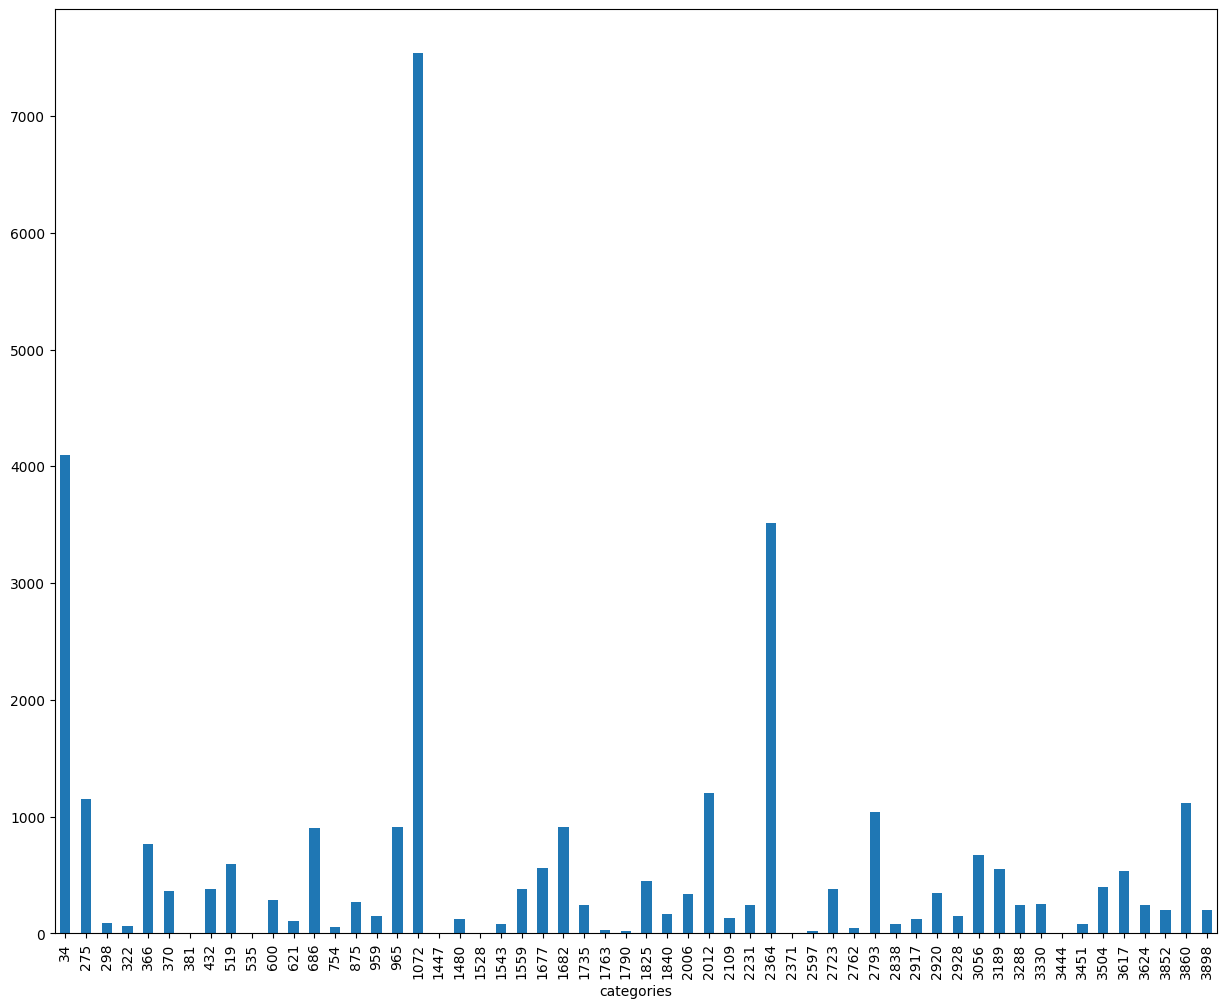

In [56]:
vcounts= catalog_df_transformed['categories'].value_counts()
value_counts_filtered = vcounts.sort_index()
value_counts_filtered.plot(kind='bar', figsize=(15, 12))

In [71]:
transactions_df= pd.read_csv("drive/MyDrive/collab_files/transactions.csv")
transactions_df['total_quantity'] = transactions_df.groupby(['customer_id', 'product_id'])['quantity'].transform('sum')
transactions_df[transactions_df['customer_id']==38769].sort_values(by=['total_quantity','purchase_date'], ascending=[False, False]).head(5)


,customer_id,product_id,purchase_date,quantity,total_quantity
926734,38769,23582,2021-01-05,3,24
715279,38769,23582,2020-11-21,4,24
599955,38769,23582,2020-10-22,3,24
477848,38769,23582,2020-09-23,4,24
329156,38769,23582,2020-08-17,4,24


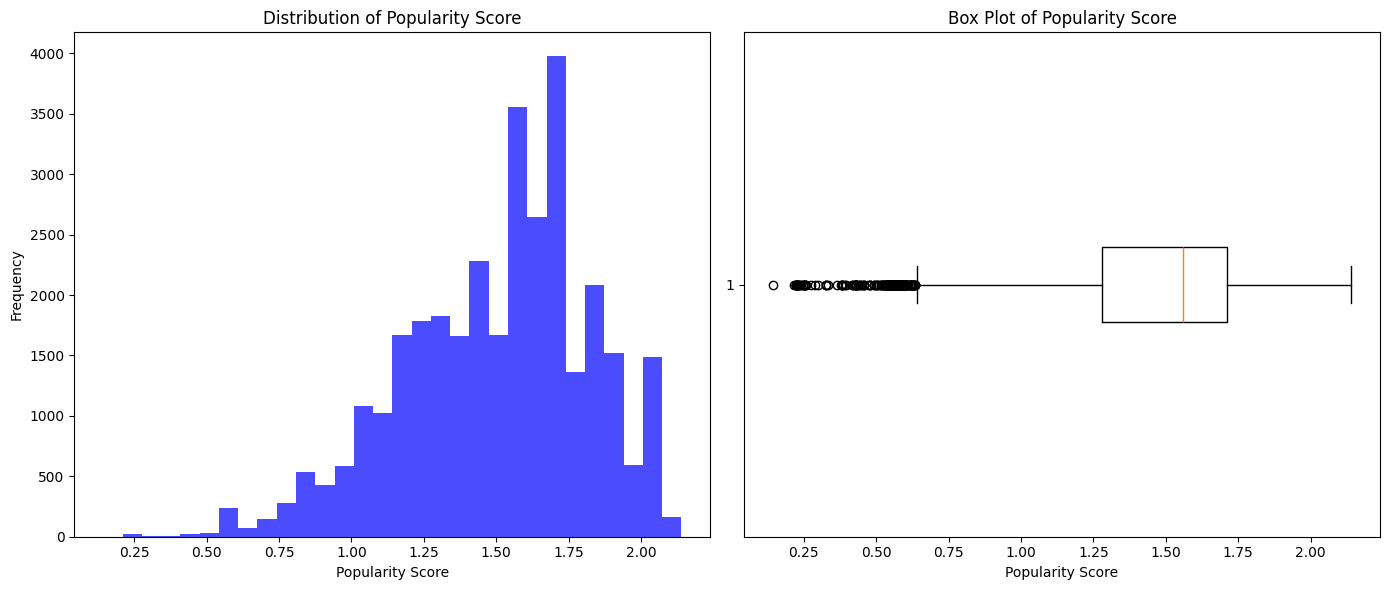

In [59]:
def calculate_popularity_score(catalog_df_transformed):
    """
    Calculate the popularity score for each product in catalog_df_transformed.

    The popularity score is the sum of the ratios of each attribute value's
    frequency in the dataset to the total number of products.
    """
    # Initialize popularity score column
    catalog_df_transformed['popularity_score'] = 0.0

    # List of columns to consider for calculating the score
    columns = ['manufacturer_id', 'attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5', 'categories']
    n = len(catalog_df_transformed)

    # Compute the frequency of each value for all columns
    for col in columns:
        value_counts = catalog_df_transformed[col].value_counts()
        value_ratios = value_counts / n

        # Add the ratio for each value to the popularity score
        catalog_df_transformed['popularity_score'] += catalog_df_transformed[col].map(value_ratios)

    return catalog_df_transformed

catalog_df_transformed = calculate_popularity_score(catalog_df_transformed)


import matplotlib.pyplot as plt

# Assuming catalog_df_transformed is already defined
# catalog_df_transformed = pd.read_csv('your_file.csv')

# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(catalog_df_transformed["popularity_score"], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Popularity Score')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)
plt.boxplot(catalog_df_transformed["popularity_score"], vert=False)
plt.title('Box Plot of Popularity Score')
plt.xlabel('Popularity Score')

# Show plots
plt.tight_layout()
plt.show()



In [95]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

# Columns to use for clustering
nominal_columns = ['manufacturer_id', 'attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5', 'categories']
numerical_column = ['popularity_score']

# One-hot encode nominal columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
nominal_encoded = encoder.fit_transform(catalog_df_transformed[nominal_columns])

# Standardize the numerical column
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(catalog_df_transformed[numerical_column])

# Combine the encoded nominal and scaled numerical features
clustering_features = np.hstack([nominal_encoded, numerical_scaled])

# Apply k-means clustering
kmeans = KMeans(n_clusters=15, random_state=42)  # Adjust n_clusters as needed
catalog_df_transformed['cluster'] = kmeans.fit_predict(clustering_features)

In [96]:
catalog_df_transformed['cluster'].value_counts()

,count
cluster,
2,4978
5,3320
9,3124
11,2450
3,2365
8,2288
0,2210
4,1985
1,1908


In [97]:
catalog_df_transformed['manufacturer_id'].value_counts().head()

,count
manufacturer_id,
322,1780
1040,390
1383,343
1111,329
406,327


In [98]:
train_start = transactions_df.merge(catalog_df_transformed, on='product_id', how='left')
train_start.head()

,customer_id,product_id,purchase_date,quantity,total_quantity,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,popularity_score,cluster
0,38769,3477,2020-06-01,1,1,186,6,0,196,0,45,3056,1.289358,8
1,42535,30474,2020-06-01,1,1,193,10,3,229,3,132,1677,0.708994,14
2,42535,15833,2020-06-01,1,1,1318,4,1,455,0,108,275,1.725866,11
3,42535,20131,2020-06-01,1,1,347,4,0,291,3,44,1682,1.155144,3
4,42535,4325,2020-06-01,1,1,539,6,0,303,0,45,3624,1.277429,8


In [140]:
# Ensure the purchase_date column is in datetime format
train_start['purchase_date'] = pd.to_datetime(train_start['purchase_date'])

# Sort the dataframe by customer_id, cluster, and purchase_date
train_start = train_start.sort_values(by=['customer_id', 'cluster', 'purchase_date'])

# Group by customer_id and cluster, calculate the day difference
train_start['day_diff'] = train_start.groupby(['customer_id', 'cluster'])['purchase_date'].diff().dt.days

# Replace day_diff = 0 with the next valid day_diff in the group
def propagate_day_diff(group):
    day_diffs = group['day_diff'].values
    n = len(day_diffs)

    # Propagate day_diff for all elements except the last one
    for i in range(n - 1):
        # If the current day_diff is 0, find the next valid day_diff
        if day_diffs[i] == 0:
            for j in range(i + 1, n):
                if day_diffs[j] > 0:  # Find the next positive day_diff
                    day_diffs[i] = day_diffs[j]
                    break
            else:
                # If no next valid value, set to NaN
                day_diffs[i] = None

    # Check the last element (the edge case)
    if day_diffs[-1] == 0:
        # Try to propagate from the previous value
        for i in range(n - 2, -1, -1):
            if day_diffs[i] > 0:
                day_diffs[-1] = day_diffs[i]
                break
        else:
            # If no valid value, set to NaN
            day_diffs[-1] = None

    return pd.Series(day_diffs, index=group.index)

# Apply the function to propagate day_diff within each group of customer_id and cluster
train_start['day_diff'] = train_start.groupby(['customer_id', 'cluster'], group_keys=False).apply(propagate_day_diff)



In [141]:
def categorize_day_diff(day_diff):
    if pd.isna(day_diff):  # Handle NaN values
        return 0
    elif 1 <= day_diff <= 7:
        return 1
    elif 8 <= day_diff <= 14:
        return 2
    elif 15 <= day_diff <= 21:
        return 3
    elif 22 <= day_diff <= 28:
        return 4
    else:
        return 0

# Apply the function to the 'day_diff' column
train_start['day_diff_category'] = train_start['day_diff'].apply(categorize_day_diff)

# Check the results
print(train_start['day_diff_category'].value_counts())

day_diff_category
0    774752
1     79406
2     76278
3     73398
4     67704
Name: count, dtype: int64


In [142]:
# Calculate the maximum day difference for each product-cluster pair
train_start['max_day_diff'] = train_start.groupby(['customer_id', 'cluster'])['day_diff'].transform('max')
train_start['min_day_diff'] = train_start.groupby(['customer_id', 'cluster'])['day_diff'].transform('min')

train_start.head()

,customer_id,product_id,purchase_date,quantity,total_quantity,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,popularity_score,cluster,day_diff,day_diff_category,max_day_diff,min_day_diff
22146,0,20664,2020-06-05,1,3,408,4,0,284,0,66,2364,1.723334,2,NaN,0,59.0,7.0
268196,0,15083,2020-08-03,1,1,286,4,0,82,0,144,1072,1.835337,2,59.0,0,59.0,7.0
334333,0,12505,2020-08-18,1,1,53,4,3,474,0,-1,2231,1.374481,2,15.0,3,59.0,7.0
390966,0,1505,2020-09-01,1,1,286,4,0,82,0,144,1072,1.835337,2,14.0,2,59.0,7.0
540881,0,20664,2020-10-09,1,3,408,4,0,284,0,66,2364,1.723334,2,38.0,0,59.0,7.0


In [143]:
train_start["day_diff"].value_counts().head(10)

,count
day_diff,
1.0,11984
7.0,11593
14.0,11440
8.0,11318
6.0,11279
3.0,11229
5.0,11227
4.0,11093
13.0,11087


In [144]:
# prompt: see how many rows contain na value

# Count rows with at least one NA value in the DataFrame
na_rows = train_start.isna().any(axis=1).sum()
print(f"Number of rows with at least one NA value: {na_rows}")

Number of rows with at least one NA value: 342343


In [148]:
# prompt: drop rows with null values

# Drop rows with any null values
train_start.dropna(inplace=True)

# Verify that there are no more null values
na_rows = train_start.isna().any(axis=1).sum()
print(f"Number of rows with at least one NA value after dropping: {na_rows}")
print(train_start['day_diff_category'].value_counts())

Number of rows with at least one NA value after dropping: 0
day_diff_category
0    432409
1     79406
2     76278
3     73398
4     67704
Name: count, dtype: int64


In [ ]:
# prompt: remove %80 of rows with day_diff_category value equal to 0

import pandas as pd

# Assuming 'train_start' DataFrame is already loaded and processed as in the provided code

# Identify rows where 'day_diff_category' is 0
rows_to_remove = train_start[train_start['day_diff_category'] == 0]

# Calculate the number of rows to remove (80%)
num_rows_to_remove = int(0.8 * len(rows_to_remove))

# Randomly select rows to remove
rows_to_remove = rows_to_remove.sample(n=num_rows_to_remove, random_state=42) # Set a random state for reproducibility

# Get the indices of the rows to remove
indices_to_remove = rows_to_remove.index

# Remove the selected rows from the DataFrame
train_start = train_start.drop(indices_to_remove)

# Now 'train_start' contains the DataFrame with 80% of rows with day_diff_category == 0 removed.
print(train_start['day_diff_category'].value_counts())

In [149]:
train_start[(train_start['customer_id'] == 130) & (train_start['cluster'] == 3)]

,customer_id,product_id,purchase_date,quantity,total_quantity,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,popularity_score,cluster,day_diff,day_diff_category,max_day_diff,min_day_diff
178424,130,6639,2020-07-11,2,4,993,4,3,487,3,144,2364,0.989260,3,26.0,4,56.0,1.0
181409,130,16215,2020-07-12,2,4,1265,4,0,491,3,89,2231,1.201123,3,1.0,1,56.0,1.0
181410,130,26940,2020-07-12,1,2,1258,4,0,487,3,44,2364,1.256529,3,18.0,3,56.0,1.0
247589,130,18775,2020-07-30,1,1,827,4,0,491,3,144,686,1.289755,3,18.0,3,56.0,1.0
247598,130,10376,2020-07-30,1,2,449,4,0,535,3,105,2793,1.138882,3,45.0,0,56.0,1.0
436875,130,6639,2020-09-13,2,4,993,4,3,487,3,144,2364,0.989260,3,45.0,0,56.0,1.0
461865,130,16215,2020-09-19,1,4,1265,4,0,491,3,89,2231,1.201123,3,6.0,1,56.0,1.0
461866,130,26940,2020-09-19,1,2,1258,4,0,487,3,44,2364,1.256529,3,28.0,4,56.0,1.0
574428,130,9429,2020-10-17,1,1,361,4,0,276,3,171,2364,1.212137,3,28.0,4,56.0,1.0
574449,130,15155,2020-10-17,1,1,569,4,0,291,3,44,2793,1.159934,3,56.0,0,56.0,1.0


In [127]:
train_start["day_diff"].value_counts()


,count
day_diff,
1.0,11984
7.0,11593
14.0,11440
8.0,11318
6.0,11279
3.0,11229
5.0,11227
4.0,11093
13.0,11087


In [225]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Drop unnecessary columns
train_data = train_start.drop(columns=['quantity', 'day_diff', 'purchase_date'])

# Define the features (X) and target (y)
X = train_data.drop(columns=['day_diff_category'])  # Features
y = train_data['day_diff_category']  # Target

# Step 1: Sample 40k examples for each class from the original data
train_data_balanced = pd.concat([
    train_data[train_data['day_diff_category'] == label].sample(40000, random_state=42)
    for label in y.unique()
])

# Step 2: Add 5k more rows for day_diff_category == 4
day_4_data = train_data[train_data['day_diff_category'] == 4]
additional_data_4 = day_4_data.sample(10000, random_state=42)

# Add the new 5k samples to the balanced dataset
train_data_balanced = pd.concat([train_data_balanced, additional_data_4])

# Step 3: Separate the features and target for the balanced dataset
X_balanced = train_data_balanced.drop(columns=['day_diff_category'])
y_balanced = train_data_balanced['day_diff_category']

# Step 4: Separate the remaining data for testing (not part of the 40k samples)
remaining_data = train_data[~train_data.index.isin(train_data_balanced.index)]
X_test = remaining_data.drop(columns=['day_diff_category'])
y_test = remaining_data['day_diff_category']

# Step 5: Split the 40k per class data into training and validation (no test data yet)
X_train = X_balanced
y_train = y_balanced

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=12, min_samples_split=10, max_features=5)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.4686
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.42      0.60    392409
           1       0.21      0.96      0.35     39406
           2       0.23      0.55      0.32     36278
           3       0.25      0.40      0.31     33398
           4       0.23      0.37      0.28     27704

    accuracy                           0.47    529195
   macro avg       0.38      0.54      0.37    529195
weighted avg       0.80      0.47      0.52    529195



In [ ]:
"""from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import pandas as pd

# Assuming 'train_start' contains 'customer_id' and 'categories' columns
# Step 1: One-hot encode the 'categories' column for each customer
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(train_start[['categories']])

# Create a DataFrame with one-hot encoded categories
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out())

# Concatenate 'customer_id' with the encoded features
encoded_df = pd.concat([train_start[['customer_id']].reset_index(drop=True), encoded_df], axis=1)
encoded_df.head()"""

,customer_id,categories_34,categories_275,categories_298,categories_322,categories_366,categories_370,categories_381,categories_432,categories_519,...,categories_3288,categories_3330,categories_3444,categories_3451,categories_3504,categories_3617,categories_3624,categories_3852,categories_3860,categories_3898
0,38769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,42535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,42535,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,42535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
"""customer_encoded = encoded_df.groupby('customer_id').sum()

# Step 3: Apply KMeans clustering on the aggregated customer features
n_clusters = 30  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_clusters = kmeans.fit_predict(customer_encoded)

# Step 4: Add cluster labels to the customer DataFrame
customer_encoded['cluster'] = customer_clusters

# Optional: Display the first few rows with 'customer_id' and their assigned cluster
customer_encoded.groupby(['cluster'])['categories_34'].count()"""

,categories_34
cluster,
0,246
1,2695
2,543
3,1226
4,541
5,795
6,2305
7,912
8,811


In [ ]:
"""customer_encoded= customer_encoded['cluster']
customer_encoded.head()"""

,cluster
customer_id,
0,6
1,12
2,20
3,3
4,14


In [ ]:
"""customer_encoded = customer_encoded.reset_index()
customer_encoded.head()"""

,customer_id,cluster
0,0,6
1,1,12
2,2,20
3,3,3
4,4,14


In [ ]:
"""train_cluster = train_start.merge(customer_encoded[['customer_id', 'cluster']], on='customer_id', how='left')
train_cluster=train_cluster.sort_values(by=['customer_id','purchase_date']).reset_index(drop=True)
train_cluster.iloc[100:110]"""

,customer_id,product_id,purchase_date,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,cluster
100,4,29388,2020-06-17,4,1,495,0,33,2006,14
101,4,1831,2020-06-17,4,0,491,0,66,2006,14
102,4,478,2020-06-17,4,0,491,0,66,2364,14
103,4,15025,2020-07-14,10,0,528,-1,132,3504,14
104,4,13921,2020-08-16,10,1,502,3,17,2364,14
105,4,31639,2020-08-16,10,1,503,0,115,1682,14
106,4,24047,2020-08-30,10,1,484,3,156,1072,14
107,4,28416,2020-09-18,4,0,453,0,108,3624,14
108,4,7445,2020-10-29,6,0,536,0,46,34,14
109,4,22512,2020-11-16,4,0,336,0,44,370,14


In [ ]:
"""train_start['purchase_date'] = pd.to_datetime(train_start['purchase_date'])
train_start.head(15)"""

,customer_id,product_id,purchase_date,quantity,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
0,38769,3477,2020-06-01,1,186,6,0,196,0,45,3056
1,42535,30474,2020-06-01,1,193,10,3,229,3,132,1677
2,42535,15833,2020-06-01,1,1318,4,1,455,0,108,275
3,42535,20131,2020-06-01,1,347,4,0,291,3,44,1682
4,42535,4325,2020-06-01,1,539,6,0,303,0,45,3624
5,42535,12919,2020-06-01,1,1338,10,0,26,0,39,2012
6,29737,9139,2020-06-01,1,703,10,0,413,3,3,1559
7,29737,5237,2020-06-01,1,1201,10,0,53,3,87,2012
8,29737,11535,2020-06-01,3,328,4,0,498,3,13,2793
9,43683,18733,2020-06-01,1,1496,4,0,17,0,81,2012


In [ ]:
train_cluster['days_diff'] = train_cluster.groupby(['cluster', 'categories'])['purchase_date'].diff().dt.days
train_cluster.head(15)

,customer_id,product_id,purchase_date,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,cluster,days_diff
0,20147,12354,2020-06-02,6,0,536,0,46,34,0,NaN
1,20147,26671,2020-06-02,6,1,536,0,46,34,0,0.0
2,22426,2701,2020-06-02,10,1,421,0,84,34,0,0.0
3,11052,22443,2020-06-03,4,1,536,0,144,34,0,1.0
4,8968,30314,2020-06-05,4,0,536,3,144,34,0,2.0
5,18421,4281,2020-06-06,10,0,536,3,147,34,0,1.0
6,14846,1737,2020-06-07,4,0,536,3,144,34,0,1.0
7,32311,22397,2020-06-07,6,0,536,0,46,34,0,0.0
8,32311,29286,2020-06-07,6,1,536,0,46,34,0,0.0
9,35231,13508,2020-06-07,10,1,503,0,17,34,0,0.0


In [ ]:
"""train = train_cluster.dropna(subset=['days_diff']).reset_index(drop=True)
train.tail(15)"""

,customer_id,product_id,purchase_date,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,cluster,days_diff
1069872,14880,2827,2020-12-12,10,1,489,3,39,3898,29,1.0
1069873,11477,1883,2020-12-17,10,0,503,0,45,3898,29,5.0
1069874,14377,22834,2020-12-26,10,3,515,0,190,3898,29,9.0
1069875,27086,9163,2020-12-26,10,0,505,0,126,3898,29,0.0
1069876,41157,19981,2020-12-27,4,1,491,0,66,3898,29,1.0
1069877,9966,7070,2020-12-29,4,1,491,3,66,3898,29,2.0
1069878,2945,4944,2021-01-02,4,1,491,0,129,3898,29,4.0
1069879,13275,29703,2021-01-05,4,0,291,0,44,3898,29,3.0
1069880,37635,4944,2021-01-10,4,1,491,0,129,3898,29,5.0
1069881,42150,26858,2021-01-11,10,1,507,3,122,3898,29,1.0


In [ ]:
"""train_cluster['days_diff'] = train_cluster.groupby(['cluster', 'product_id'])['purchase_date'].diff().dt.days
train_cluster.sort_values(by=['cluster', 'product_id', 'purchase_date']).head(30)"""


,customer_id,product_id,purchase_date,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,cluster,days_diff
396,42944,14,2020-09-06,10,0,506,3,17,275,0,NaN
3583,13202,26,2020-07-07,10,0,503,0,184,965,0,NaN
7860,37229,28,2020-07-08,4,1,469,0,-1,2723,0,NaN
688,40808,30,2020-06-09,4,0,536,3,144,370,0,NaN
761,28664,30,2020-06-21,4,0,536,3,144,370,0,12.0
935,4973,30,2020-07-11,4,0,536,3,144,370,0,20.0
985,3974,30,2020-07-17,4,0,536,3,144,370,0,6.0
1075,28664,30,2020-07-29,4,0,536,3,144,370,0,12.0
1190,28664,30,2020-08-12,4,0,536,3,144,370,0,14.0
1270,18472,30,2020-08-20,4,0,536,3,144,370,0,8.0


In [ ]:
"""train.groupby(['cluster', 'categories'])['days_diff'].mean().sort_values(ascending=False).head()"""

,,days_diff
cluster,categories,
8,1528,114.0
20,1528,105.0
11,754,99.0
15,1447,90.0
12,3444,74.5


In [ ]:
"""def assign_week_value(days):
    if pd.isna(days) or days > 28:
        return 0
    elif days <= 7:
        return 1
    elif days <= 14:
        return 2
    elif days <= 21:
        return 3
    elif days <= 28:
        return 4"""

In [ ]:
"""train['week_value'] = train['days_diff'].apply(assign_week_value)
train.sort_values(by=['cluster', 'categories', 'purchase_date'], inplace=True)
train.head(15)"""

,customer_id,product_id,purchase_date,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,cluster,days_diff,week_value
0,20147,26671,2020-06-02,6,1,536,0,46,34,0,0.0,1
1,22426,2701,2020-06-02,10,1,421,0,84,34,0,0.0,1
2,11052,22443,2020-06-03,4,1,536,0,144,34,0,1.0,1
3,8968,30314,2020-06-05,4,0,536,3,144,34,0,2.0,1
4,18421,4281,2020-06-06,10,0,536,3,147,34,0,1.0,1
5,14846,1737,2020-06-07,4,0,536,3,144,34,0,1.0,1
6,32311,22397,2020-06-07,6,0,536,0,46,34,0,0.0,1
7,32311,29286,2020-06-07,6,1,536,0,46,34,0,0.0,1
8,35231,13508,2020-06-07,10,1,503,0,17,34,0,0.0,1
9,35231,25815,2020-06-07,10,1,503,0,17,34,0,0.0,1


In [ ]:
"""train['week_value'].value_counts()"""

,count
week_value,
1,1065084
2,3186
3,783
0,533
4,301


In [ ]:
"""train.drop(columns=['purchase_date','days_diff','product_id'],inplace=True)"""

In [ ]:
"""train.head()"""

,customer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,cluster,week_value
0,20147,6,1,536,0,46,34,0,1
1,22426,10,1,421,0,84,34,0,1
2,11052,4,1,536,0,144,34,0,1
3,8968,4,0,536,3,144,34,0,1
4,18421,10,0,536,3,147,34,0,1


In [ ]:
"""!pip install kmodes"""

In [170]:
""""from kmodes.kmodes import KModes
import pandas as pd

# Assuming train is your DataFrame
# Remove 'customer_id' and 'week_value' for clustering as per your preference
categorical_columns = list(train.columns)
categorical_columns.remove('customer_id')
categorical_columns.remove('week_value')

# Convert DataFrame to numpy array for K-Modes
data = train[categorical_columns].to_numpy()

# Apply K-Modes clustering
kmodes = KModes(n_clusters=5, init='Huang', random_state=0)  # Adjust number of clusters as needed
clusters = kmodes.fit_predict(data)

# Add cluster labels to the original DataFrame
train['cluster'] = clusters

train.head()"""

'"from kmodes.kmodes import KModes\nimport pandas as pd\n\n# Assuming train is your DataFrame\n# Remove \'customer_id\' and \'week_value\' for clustering as per your preference\ncategorical_columns = list(train.columns)\ncategorical_columns.remove(\'customer_id\')\ncategorical_columns.remove(\'week_value\')\n\n# Convert DataFrame to numpy array for K-Modes\ndata = train[categorical_columns].to_numpy()\n\n# Apply K-Modes clustering\nkmodes = KModes(n_clusters=5, init=\'Huang\', random_state=0)  # Adjust number of clusters as needed\nclusters = kmodes.fit_predict(data)\n\n# Add cluster labels to the original DataFrame\ntrain[\'cluster\'] = clusters\n\ntrain.head()'

In [ ]:
"""a = train.groupby(['customer_id', 'categories'])['week_value'].agg(pd.Series.mode)"""


In [ ]:
"""train.head(15)"""

,customer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,cluster,week_value
0,20147,6,1,536,0,46,34,0,1
1,22426,10,1,421,0,84,34,0,1
2,11052,4,1,536,0,144,34,0,1
3,8968,4,0,536,3,144,34,0,1
4,18421,10,0,536,3,147,34,0,1
5,14846,4,0,536,3,144,34,0,1
6,32311,6,0,536,0,46,34,0,1
7,32311,6,1,536,0,46,34,0,1
8,35231,10,1,503,0,17,34,0,1
9,35231,10,1,503,0,17,34,0,1


In [ ]:
"""train['week_value'].value_counts()"""

In [ ]:
"""from sklearn.preprocessing import LabelEncoder

# Assuming your data is in a DataFrame named 'df'

# Select the categorical columns
categorical_cols = ['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5']

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Fit and transform the categorical columns
for col in categorical_cols:
    train[col] = encoder.fit_transform(train[col])"""

In [ ]:
"""train.head()"""

,customer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,cluster,week_value
0,20147,7,1,537,1,46,34,0,1
1,22426,11,1,422,1,84,34,0,1
2,11052,5,1,537,1,144,34,0,1
3,8968,5,0,537,4,144,34,0,1
4,18421,11,0,537,4,147,34,0,1


In [ ]:
"""import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming train_df is already loaded and normalized/standardized

# Prepare features (X) and target (y) excluding 'week', 'product_id', 'customer_id', and 'manufacturer_id'
X = train.drop(columns=['week_value','cluster'])
y = train['week_value']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.head(15)"""

,customer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
666394,8226,7,0,283,1,146,2006
789841,41209,7,0,211,4,137,2231
70481,33411,5,0,485,4,175,1072
506436,45058,5,0,28,4,66,2012
120588,1699,5,0,488,1,144,2364
774313,27363,7,0,209,4,122,3056
381182,14403,5,0,56,1,111,2012
69866,22716,5,0,492,1,66,1072
495697,11556,5,0,292,4,44,1682
1012903,1106,11,0,504,4,18,275


In [ ]:
"""y_train.head()"""

In [ ]:
"""model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)"""

RandomForestClassifier(random_state=42)

In [ ]:
"""# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val.to_numpy(), y_pred)
report = classification_report(y_val.to_numpy(), y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)"""

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.16      0.17       107
           1       1.00      1.00      1.00    213017
           2       0.13      0.09      0.11       637
           3       0.05      0.04      0.04       157
           4       0.03      0.02      0.02        60

    accuracy                           0.99    213978
   macro avg       0.28      0.26      0.27    213978
weighted avg       0.99      0.99      0.99    213978



In [173]:
test_df= pd.read_csv("drive/MyDrive/collab_files/test.csv")
test_df.head()

,id,customer_id,product_id,prediction
0,0,0,20664,NaN
1,1,0,28231,NaN
2,2,13,2690,NaN
3,3,15,1299,NaN
4,4,15,20968,NaN


In [154]:
X_test = test_df.merge(catalog_df, on='product_id', how='left')


In [155]:
X_test.head()

,id,customer_id,product_id,prediction,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
0,0,0,20664,NaN,408,4,0,284,0,66,"[236, 356]"
1,1,0,28231,NaN,193,4,3,468,3,108,"[3024, 3955, 3956]"
2,2,13,2690,NaN,406,4,3,491,0,66,[2995]
3,3,15,1299,NaN,1056,4,0,474,-1,108,"[949, 2424, 2563, 3900, 3901, 3902, 3903]"
4,4,15,20968,NaN,1315,4,0,444,0,144,"[2629, 3228, 3914, 3915]"


In [156]:
X_test['categories'] = X_test['categories'].astype(str)
X_test['categories'] = X_test['categories'].apply(ast.literal_eval)


In [157]:
X_test = X_test.apply(lambda row: category_row_transform(row,category_map_df_filtered,parent_list),axis=1)

In [158]:
X_test.loc[X_test['categories'] == 336, 'categories'] = 366
X_test.loc[X_test['categories'] == 252, 'categories'] = 275
X_test.loc[X_test['categories'] >= 3898, 'categories'] = 3898
X_test.loc[X_test['categories'] == 422, 'categories'] = 432
X_test.loc[X_test['categories'] == 678, 'categories'] = 686
X_test.loc[X_test['categories'] == 857, 'categories'] = 875
X_test.loc[X_test['categories'] == 1062, 'categories'] = 1072
X_test.loc[X_test['categories'] == 1557, 'categories'] = 1559
X_test.loc[X_test['categories'] == 1565, 'categories'] = 1559
X_test.loc[X_test['categories'] == 1666, 'categories'] = 1677
X_test.loc[X_test['categories'] == 2011, 'categories'] = 2012
X_test.loc[X_test['categories'] == 2209, 'categories'] = 2109
X_test.loc[X_test['categories'] == 2346, 'categories'] = 2364
X_test.loc[X_test['categories'] == 3283, 'categories'] = 3288
X_test.loc[X_test['categories'] == 3540, 'categories'] = 3504
X_test.loc[X_test['categories'] == 3613, 'categories'] = 3617
X_test.loc[X_test['categories'] == 3616, 'categories'] = 3617
X_test.loc[X_test['categories'] == 3752, 'categories'] = 3852

In [159]:
X_test['categories'].value_counts().head(5)

,count
categories,
2364,1321
2012,1111
2793,907
1682,784
1072,767


In [160]:
X_test.drop(columns=['prediction','id'],inplace=True)

In [161]:
"""X_test.head()"""

,customer_id,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
0,0,20664,408,4,0,284,0,66,2364
1,0,28231,193,4,3,468,3,108,1682
2,13,2690,406,4,3,491,0,66,3189
3,15,1299,1056,4,0,474,-1,108,2723
4,15,20968,1315,4,0,444,0,144,2920


In [ ]:
"""categorical_cols = ['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5']

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Fit and transform the categorical columns
for col in categorical_cols:
    X_test[col] = encoder.fit_transform(X_test[col])"""

In [163]:
X_test.head()

,customer_id,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
0,0,20664,408,4,0,284,0,66,2364
1,0,28231,193,4,3,468,3,108,1682
2,13,2690,406,4,3,491,0,66,3189
3,15,1299,1056,4,0,474,-1,108,2723
4,15,20968,1315,4,0,444,0,144,2920


In [181]:
# Remove duplicates from train_data based on customer_id and product_id
train_data_unique = train_data.drop_duplicates(subset=['customer_id', 'product_id'])

# Perform a left join between test_df and the deduplicated train_data
result = pd.merge(test_df, train_data_unique, on=['customer_id', 'product_id'], how='left')

# Verify that result has the same length as test_df
print(result.shape)  # This should be (10000, n) where n is the number of columns after the merge


(10000, 17)


In [183]:
# prompt: drop id , prediction and day_diff_category columns from result

result = result.drop(columns=['id', 'prediction', 'day_diff_category'])

In [184]:
result.head()

,customer_id,product_id,total_quantity,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,popularity_score,cluster,max_day_diff,min_day_diff
0,0,20664,3.0,408.0,4.0,0.0,284.0,0.0,66.0,2364.0,1.723334,2.0,59.0,7.0
1,0,28231,4.0,193.0,4.0,3.0,468.0,3.0,108.0,1682.0,0.840585,3.0,45.0,7.0
2,13,2690,4.0,406.0,4.0,3.0,491.0,0.0,66.0,3189.0,1.402398,2.0,78.0,9.0
3,15,1299,4.0,1056.0,4.0,0.0,474.0,-1.0,108.0,2723.0,0.904900,12.0,81.0,19.0
4,15,20968,4.0,1315.0,4.0,0.0,444.0,0.0,144.0,2920.0,1.621552,2.0,63.0,2.0


In [187]:
# prompt: show how the customer_id and product_id of rows with null values in that row in result df

import pandas as pd

# Assuming 'result' DataFrame is already created as in the previous code

# Find rows with null values in any column
null_rows = result[result.isnull().any(axis=1)]

# Display customer_id and product_id of rows with null values
print(null_rows[['customer_id', 'product_id']])

      customer_id  product_id
525          2629        8615
1723         7886        6766
1727         7892       30109
2079         9646       12808
2473        11531        5464
3707        16898       28395
3712        16910       20131
6598        30517       29657
7436        34617       16294
7606        35284       12148
7731        35842       23476
8177        37952       32148
8833        40736        2103


In [168]:
# prompt: check if every customer_id in the x_test df exists in product_catalog_df too

# Check if every customer_id in the x_test df exists in product_catalog_df too
customer_ids_test = set(X_test['customer_id'].unique())
customer_ids_catalog = set(train_start['customer_id'].unique())

missing_customer_ids = customer_ids_test - customer_ids_catalog

if missing_customer_ids:
    print("The following customer IDs in the test set are not present in the product catalog:")
    print(missing_customer_ids)
else:
    print("All customer IDs in the test set are present in the product catalog.")

All customer IDs in the test set are present in the product catalog.


In [189]:
# prompt: change the null values in columns with 0

# Fill NaN values with 0 in all columns of the 'result' DataFrame
result.fillna(0, inplace=True)
null_counts = train_start.isnull().sum()
null_counts

,0
customer_id,0
product_id,0
purchase_date,0
quantity,0
total_quantity,0
manufacturer_id,0
attribute_1,0
attribute_2,0
attribute_3,0
attribute_4,0


In [185]:
X_train.head()

,customer_id,product_id,total_quantity,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,popularity_score,cluster,max_day_diff,min_day_diff
443302,21780,9134,1,186,6,0,506,3,137,275,0.854619,8,41.0,7.0
226680,12458,16904,1,993,4,0,258,3,137,2917,1.114932,3,40.0,17.0
76723,44427,1782,1,6,4,3,321,0,144,3624,1.295399,2,163.0,10.0
600926,29200,21827,15,219,10,0,536,0,97,2231,1.560471,9,45.0,8.0
730642,19890,19267,3,1496,10,0,348,0,95,3624,1.442244,9,92.0,2.0


In [226]:
import pandas as pd

# Assuming you have already trained your model as before
predictions = rf_model.predict(result)

# Prepare the output DataFrame
output_df = pd.DataFrame({
    'id': test_df['id'],
    'customer_id': test_df['customer_id'],
    'product_id': test_df['product_id'],
    'prediction': predictions
})

# Display the output DataFrame
print(output_df['prediction'].value_counts())


# Optionally, save the output to a CSV file
output_df.to_csv('predictions_output.csv', index=False)


prediction
1    3850
0    2046
2    1656
4    1449
3     999
Name: count, dtype: int64


In [ ]:
output_df